

## **Dataset Source**

**Dataset Name:** Stunting and Wasting Dataset (Synthetic)

**Source:** Kaggle
(URL: https://www.kaggle.com/datasets/jabirmuktabir/stunting-wasting-dataset)



**About the Data:**

This is a synthetic dataset created for child growth analysis. It contains 100,000 records of children with information about:
- Gender (Jenis Kelamin)
- Age in months (Umur dalam bulan)
- Height in cm (Tinggi Badan)
- Weight in kg (Berat Badan)
- Stunting classification
- Wasting classification

**Why this dataset?**

I chose this dataset because child malnutrition is an important health issue. The dataset is large (100k samples) and has clear labels for both stunting and wasting, making it good for classification tasks. According to a research done by WHO in 2022, 149 million children under 5 were estimated to be stunted. and 45 million to be wasted.

**Note:**

This dataset is synthetic (artificially created) and NOT from sklearn or keras libraries. I downloaded it from Kaggle, an open data platform.


In [23]:
# Import all the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
data = pd.read_csv('/content/stunting_wasting_dataset.csv')

In [3]:
# Check basic data information
print("="*70)
print("Shape:", data.shape)
print("="*70)
print("\nFirst 5 rows:")
print(data.head())
print("="*70)

Shape: (100000, 6)

First 5 rows:
  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  \
0     Laki-laki            19               91.6              13.3   
1     Laki-laki            20               77.7               8.5   
2     Laki-laki            10               79.0              10.3   
3     Perempuan             2               50.3               8.3   
4     Perempuan             5               56.4              10.9   

           Stunting             Wasting  
0              Tall  Risk of Overweight  
1           Stunted         Underweight  
2            Normal  Risk of Overweight  
3  Severely Stunted  Risk of Overweight  
4  Severely Stunted  Risk of Overweight  


In [4]:
# Check data types and missing values

print("="*70)
print(data.info())
print("="*70)
print("\nMissing values:")
print(data.isnull().sum())
print("="*70)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB
None

Missing values:
Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


In [5]:
# Check target distribution - Stunting

print("="*70)
print("Stunting classes:")
print(data['Stunting'].value_counts())
print("="*70)
print("\nPercentages:")
print(data['Stunting'].value_counts(normalize=True) * 100)
print("="*70)

Stunting classes:
Stunting
Normal              72312
Stunted             16160
Severely Stunted     5819
Tall                 5709
Name: count, dtype: int64

Percentages:
Stunting
Normal              72.312
Stunted             16.160
Severely Stunted     5.819
Tall                 5.709
Name: proportion, dtype: float64


In [6]:
# Check target distribution - Wasting

print("="*70)
print("Wasting classes:")
print(data['Wasting'].value_counts())
print("="*70)
print("\nPercentages:")
print(data['Wasting'].value_counts(normalize=True) * 100)
print("="*70)

Wasting classes:
Wasting
Risk of Overweight      41897
Normal weight           35989
Severely Underweight    12231
Underweight              9883
Name: count, dtype: int64

Percentages:
Wasting
Risk of Overweight      41.897
Normal weight           35.989
Severely Underweight    12.231
Underweight              9.883
Name: proportion, dtype: float64


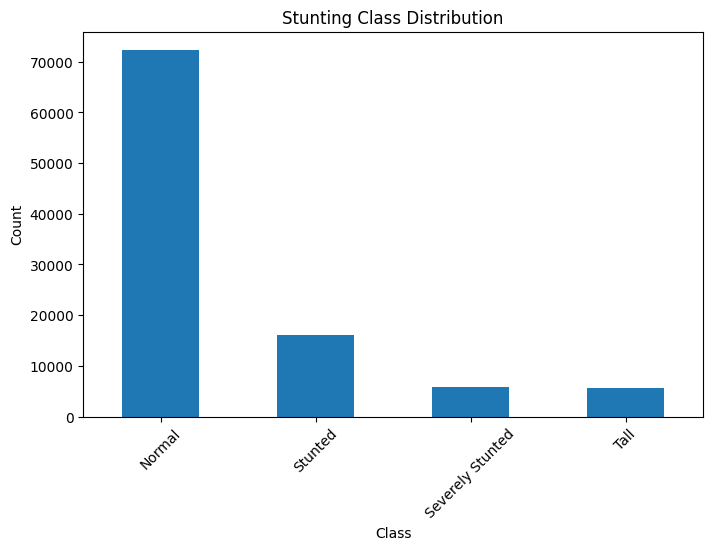

In [7]:
# Plot Stunting distribution
plt.figure(figsize=(8,5))
data['Stunting'].value_counts().plot(kind='bar')
plt.title('Stunting Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

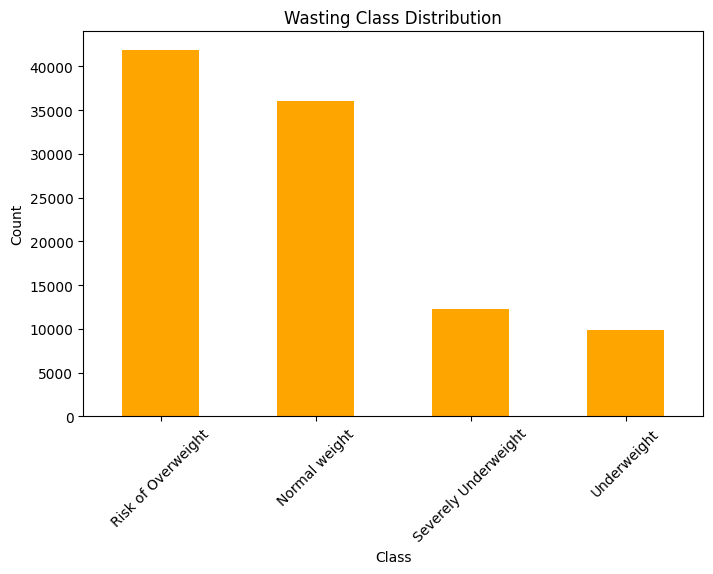

In [8]:
# Plot Wasting distribution
plt.figure(figsize=(8,5))
data['Wasting'].value_counts().plot(kind='bar', color='orange')
plt.title('Wasting Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Check numerical features statistics

print(data[['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']].describe())

        Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)
count  100000.000000      100000.000000     100000.000000
mean       11.992580          73.132657          9.259256
std         7.199671          11.360846          3.300780
min         0.000000          42.600000          1.000000
25%         6.000000          65.500000          6.900000
50%        12.000000          74.200000          9.200000
75%        18.000000          81.400000         11.700000
max        24.000000          97.600000         17.200000


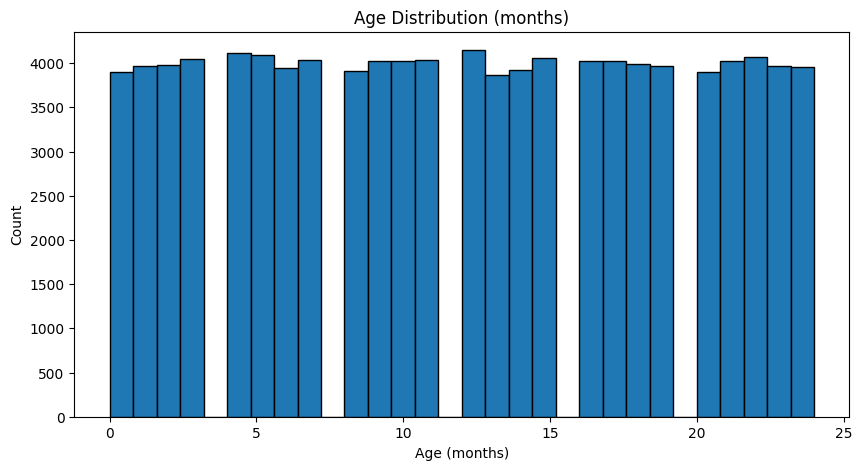

In [10]:
# Plot age distribution

plt.figure(figsize=(10,5))
plt.hist(data['Umur (bulan)'], bins=30, edgecolor='black')
plt.title('Age Distribution (months)')
plt.xlabel('Age (months)')
plt.ylabel('Count')
plt.show()

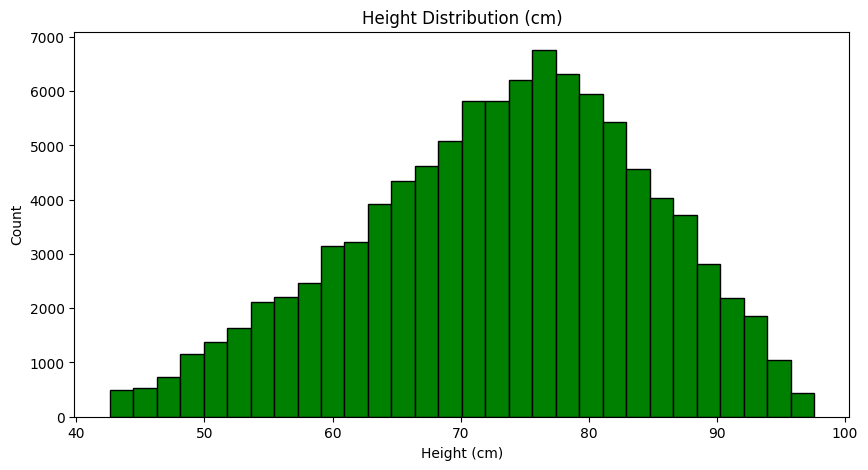

In [11]:
# Plot height distribution

plt.figure(figsize=(10,5))
plt.hist(data['Tinggi Badan (cm)'], bins=30, edgecolor='black', color='green')
plt.title('Height Distribution (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

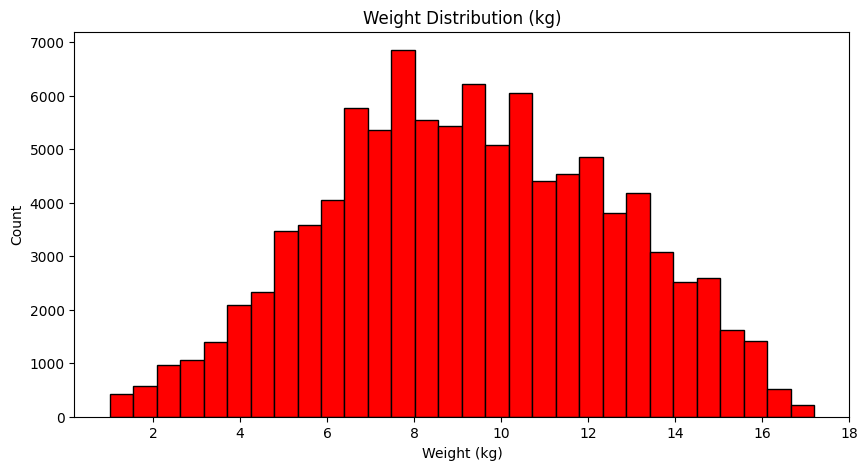

In [12]:
# Plot weight distribution
plt.figure(figsize=(10,5))
plt.hist(data['Berat Badan (kg)'], bins=30, edgecolor='black', color='red')
plt.title('Weight Distribution (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

In [13]:
# Gender distribution
print("Gender distribution:")
print(data['Jenis Kelamin'].value_counts())

Gender distribution:
Jenis Kelamin
Laki-laki    50179
Perempuan    49821
Name: count, dtype: int64


In [14]:
# Encode gender
le_gender = LabelEncoder()
data['Gender_encoded'] = le_gender.fit_transform(data['Jenis Kelamin'])
print("Gender mapping:")
for i, label in enumerate(le_gender.classes_):
    print(f"{label} -> {i}")

Gender mapping:
Laki-laki -> 0
Perempuan -> 1


In [15]:
# Encode target (Stunting)

le_stunting = LabelEncoder()
data['Stunting_encoded'] = le_stunting.fit_transform(data['Stunting'])
print("Stunting mapping:")
for i, label in enumerate(le_stunting.classes_):
    print(f"{label} -> {i}")

Stunting mapping:
Normal -> 0
Severely Stunted -> 1
Stunted -> 2
Tall -> 3


In [16]:
# Select features and target
features = ['Gender_encoded', 'Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
X = data[features]
y = data['Stunting_encoded']
print("Features:", features)
print("X shape:", X.shape)
print("y shape:", y.shape)

Features: ['Gender_encoded', 'Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
X shape: (100000, 4)
y shape: (100000,)


In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 80000
Test size: 20000


In [18]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling complete")

Scaling complete


In [19]:
# Experiment 1 - Logistic Regression
model1 = LogisticRegression(max_iter=1000, random_state=42)
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)
print("Logistic Regression trained")

Logistic Regression trained


In [20]:
# Evaluate Logistic Regression
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", acc1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred1, target_names=le_stunting.classes_))

Accuracy: 0.8093

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.87      0.94      0.91     14462
Severely Stunted       0.39      0.10      0.15      1164
         Stunted       0.55      0.60      0.57      3232
            Tall       0.85      0.42      0.56      1142

        accuracy                           0.81     20000
       macro avg       0.66      0.52      0.55     20000
    weighted avg       0.79      0.81      0.79     20000



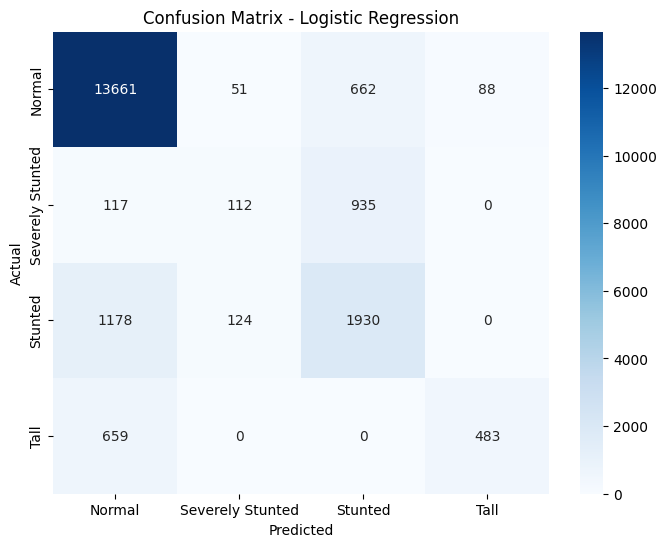

In [21]:
# Confusion Matrix - Logistic Regression
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_stunting.classes_,
            yticklabels=le_stunting.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

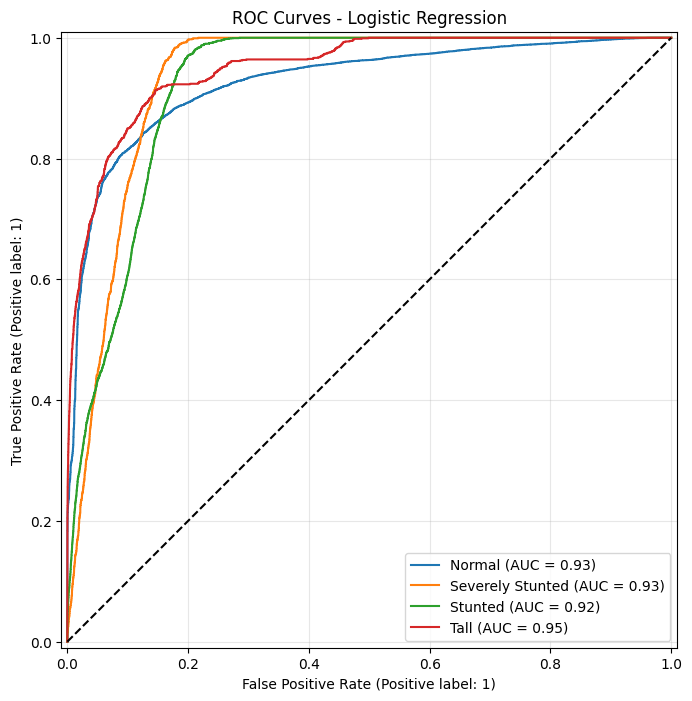

In [24]:
# For Logistic Regression (Experiment 1)

fig, ax = plt.subplots(figsize=(10, 8))
for i, class_name in enumerate(le_stunting.classes_):
    viz = RocCurveDisplay.from_predictions(
        y_test == i,
        model1.predict_proba(X_test_scaled)[:, i],
        name=f'{class_name}',
        ax=ax
    )
plt.title('ROC Curves - Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# Experiment 2 - Random Forest
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)
print("Random Forest trained")

Random Forest trained


In [26]:
# Evaluate Random Forest
acc2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", acc2)
print("\nClassification Report:")
print(classification_report(y_test, y_pred2, target_names=le_stunting.classes_))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

          Normal       1.00      1.00      1.00     14462
Severely Stunted       1.00      1.00      1.00      1164
         Stunted       1.00      1.00      1.00      3232
            Tall       1.00      1.00      1.00      1142

        accuracy                           1.00     20000
       macro avg       1.00      1.00      1.00     20000
    weighted avg       1.00      1.00      1.00     20000



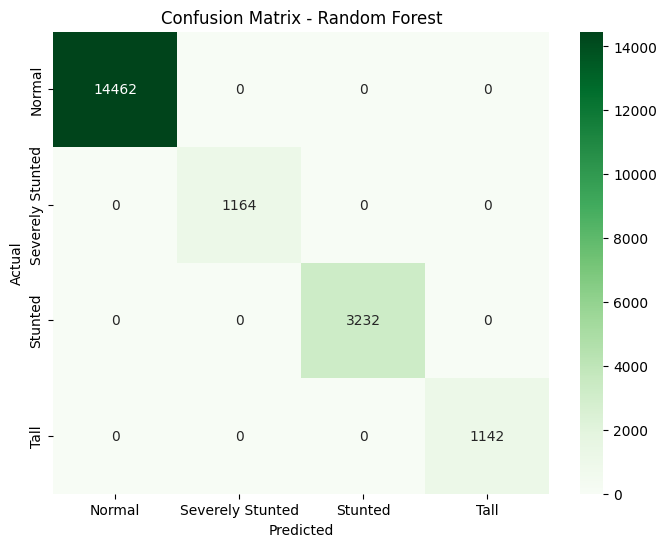

In [27]:
# Confusion Matrix - Random Forest
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_stunting.classes_,
            yticklabels=le_stunting.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC CURVES - Experiment 2: Random Forest


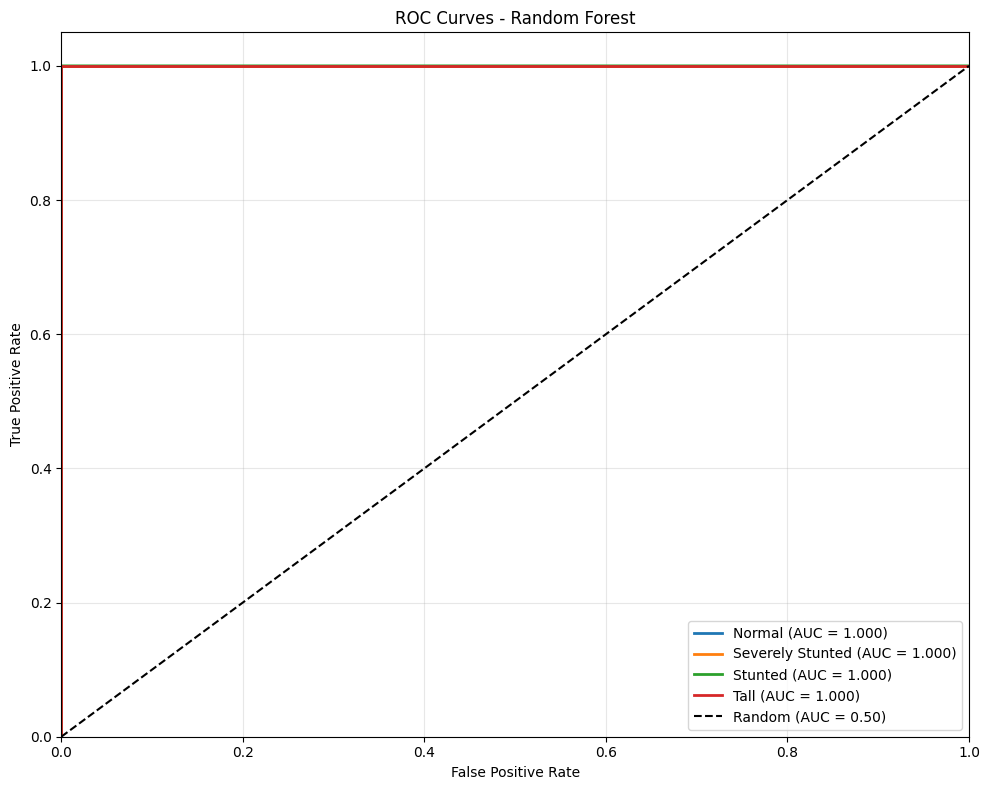

In [33]:

print("\n" + "="*50)
print("ROC CURVES - Experiment 2: Random Forest")
print("="*50)

# Get prediction probabilities
y_pred2_proba = model2.predict_proba(X_test_scaled)

# Create plot
plt.figure(figsize=(10, 8))

# Plot ROC for each class
for i, class_name in enumerate(le_stunting.classes_):
    # Create binary labels for current class
    y_test_binary = (y_test == i).astype(int)

    # Get probabilities for current class
    y_score = y_pred2_proba[:, i]

    # Calculate and plot
    fpr, tpr, _ = roc_curve(y_test_binary, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.3f})')

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
# Experiment 3 - Neural Network (Sequential API)
tf.keras.backend.clear_session()
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(le_stunting.classes_), activation='softmax')
])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,532 (9.89 KB)

 Trainable params: 2,532 (9.89 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train Neural Network
history3 = model3.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7753 - loss: 0.6023 - val_accuracy: 0.9168 - val_loss: 0.2354
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8732 - loss: 0.2881 - val_accuracy: 0.9283 - val_loss: 0.1844
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9054 - loss: 0.2243 - val_accuracy: 0.9524 - val_loss: 0.1425
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9156 - loss: 0.1991 - val_accuracy: 0.9480 - val_loss: 0.1305
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9226 - loss: 0.1837 - val_accuracy: 0.9560 - val_loss: 0.1143
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9274 - loss: 0.1745 - val_accuracy: 0.9567 - val_loss: 0.1077
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9311 - loss: 0.1631 - val_accuracy: 0.9463 - val_loss: 0.1238
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9329 - loss: 0.1579 - 

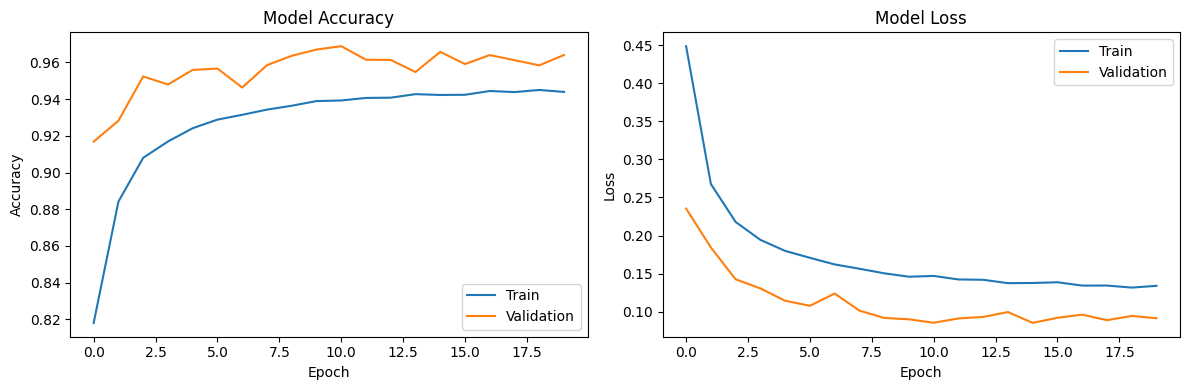

In [36]:
# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'], label='Train')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
#  Evaluate Neural Network
y_pred3_proba = model3.predict(X_test_scaled)
y_pred3 = np.argmax(y_pred3_proba, axis=1)
acc3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", acc3)
print("\nClassification Report:")
print(classification_report(y_test, y_pred3, target_names=le_stunting.classes_))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step
Accuracy: 0.9641

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.99      0.97      0.98     14462
Severely Stunted       0.95      0.90      0.92      1164
         Stunted       0.94      0.95      0.95      3232
            Tall       0.76      0.98      0.86      1142

        accuracy                           0.96     20000
       macro avg       0.91      0.95      0.93     20000
    weighted avg       0.97      0.96      0.97     20000



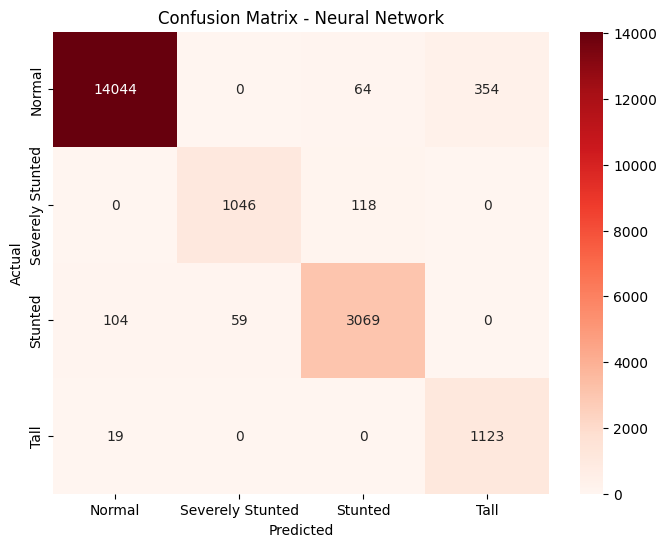

In [38]:
# Confusion Matrix - Neural Network
cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8,6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Reds',
            xticklabels=le_stunting.classes_,
            yticklabels=le_stunting.classes_)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curves - Experiment 3
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


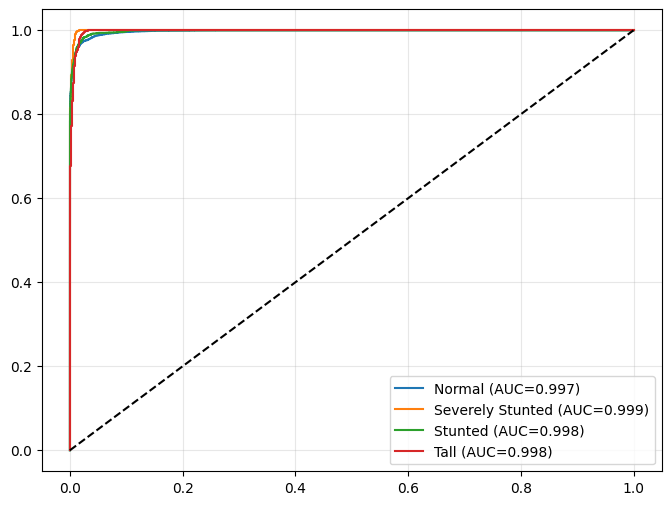

In [39]:
print("ROC Curves - Experiment 3")

probs = model3.predict(X_test_scaled)
plt.figure(figsize=(8,6))

for i, name in enumerate(le_stunting.classes_):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), probs[:, i])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
# Experiment 4 - Neural Network with Functional API
tf.keras.backend.clear_session()
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Define input
inputs = Input(shape=(X_train_scaled.shape[1],))

# Hidden layers
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

# Output
outputs = Dense(len(le_stunting.classes_), activation='softmax')(x)

# Create model
model4 = Model(inputs=inputs, outputs=outputs)
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,532 (9.89 KB)

 Trainable params: 2,532 (9.89 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Train Functional API model
history4 = model4.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7779 - loss: 0.6045 - val_accuracy: 0.8934 - val_loss: 0.2408
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8716 - loss: 0.2916 - val_accuracy: 0.9476 - val_loss: 0.1725
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9026 - loss: 0.2303 - val_accuracy: 0.9427 - val_loss: 0.1397
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9164 - loss: 0.1979 - val_accuracy: 0.9558 - val_loss: 0.1242
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9212 - loss: 0.1850 - val_accuracy: 0.9563 - val_loss: 0.1200
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9282 - loss: 0.1705 - val_accuracy: 0.9655 - val_loss: 0.1023
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9323 - loss: 0.1592 - val_accuracy: 0.9635 - val_loss: 0.0966
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9361 - loss: 0.1563 -

In [42]:
# Evaluate Functional API model
y_pred4_proba = model4.predict(X_test_scaled)
y_pred4 = np.argmax(y_pred4_proba, axis=1)
acc4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", acc4)
print("\nClassification Report:")
print(classification_report(y_test, y_pred4, target_names=le_stunting.classes_))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.96935

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.98      0.99      0.98     14462
Severely Stunted       0.96      0.89      0.92      1164
         Stunted       0.95      0.94      0.94      3232
            Tall       0.90      0.89      0.90      1142

        accuracy                           0.97     20000
       macro avg       0.95      0.93      0.94     20000
    weighted avg       0.97      0.97      0.97     20000



ROC Curves - Experiment 3
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


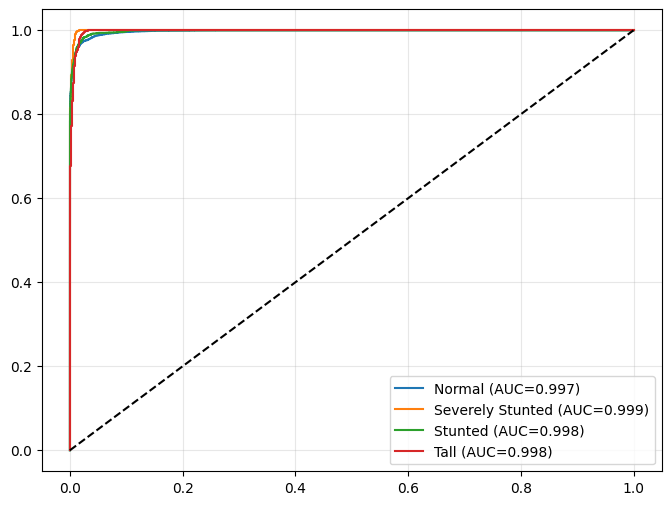

In [45]:
print("ROC Curves - Experiment 3")

probs = model3.predict(X_test_scaled)
plt.figure(figsize=(8,6))

for i, name in enumerate(le_stunting.classes_):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), probs[:, i])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [43]:
# Experiment 5 - Neural Network with tf.data API
# Create tf.data dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))
train_dataset = train_dataset.shuffle(100).batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test))
test_dataset = test_dataset.batch(32)

print("tf.data datasets created")

tf.data datasets created


In [46]:
# Train with tf.data
tf.keras.backend.clear_session()
model5 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(le_stunting.classes_), activation='softmax')
])
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history5 = model5.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=20,
    verbose=1
)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7768 - loss: 0.5731 - val_accuracy: 0.9045 - val_loss: 0.2332
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8862 - loss: 0.2664 - val_accuracy: 0.9276 - val_loss: 0.1739
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9090 - loss: 0.2152 - val_accuracy: 0.9463 - val_loss: 0.1454
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9235 - loss: 0.1836 - val_accuracy: 0.9606 - val_loss: 0.1184
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9273 - loss: 0.1710 - val_accuracy: 0.9643 - val_loss: 0.1101
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9332 - loss: 0.1602 - val_accuracy: 0.9571 - val_loss: 0.1139
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9373 - loss: 0.1513 - val_accuracy: 0.9622 - val_loss: 0.1015
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9402 - loss: 0.1455 -

In [47]:
# Evaluate the model
y_pred5_proba = model5.predict(X_test_scaled)
y_pred5 = np.argmax(y_pred4_proba, axis=1)
acc5 = accuracy_score(y_test, y_pred5)
print("Accuracy:", acc5)
print("\nClassification Report:")
print(classification_report(y_test, y_pred5, target_names=le_stunting.classes_))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.96935

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.98      0.99      0.98     14462
Severely Stunted       0.96      0.89      0.92      1164
         Stunted       0.95      0.94      0.94      3232
            Tall       0.90      0.89      0.90      1142

        accuracy                           0.97     20000
       macro avg       0.95      0.93      0.94     20000
    weighted avg       0.97      0.97      0.97     20000



ROC Curves - Experiment 5 (tf.data NN)
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


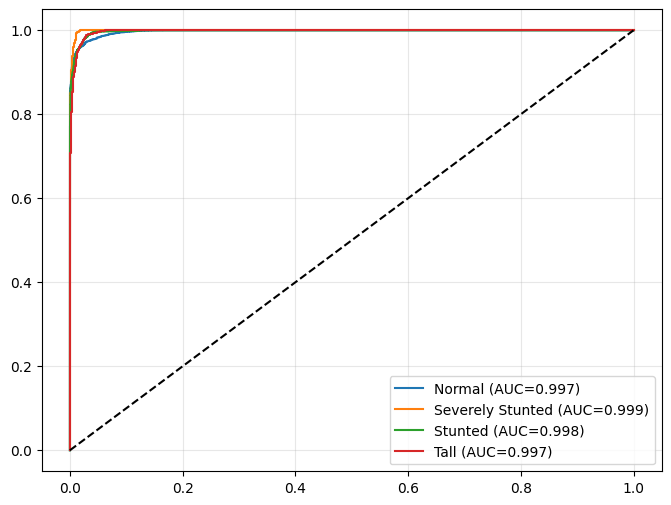

In [48]:
print("ROC Curves - Experiment 5 (tf.data NN)")

probs = model5.predict(X_test_scaled)
plt.figure(figsize=(8,6))

for i, name in enumerate(le_stunting.classes_):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), probs[:, i])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [49]:
# Experiment 6
# Define callbacks

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.0001,
    verbose=1
)

print("=====Callbacks created:========")
print(" ")
print("- EarlyStopping: stops if val_loss doesn't improve for 5 epochs")
print("- ReduceLROnPlateau: cuts learning rate in half if no improvement for 3 epochs")
print("="*80)

=====Callbacks created:========
 
- EarlyStopping: stops if val_loss doesn't improve for 5 epochs
- ReduceLROnPlateau: cuts learning rate in half if no improvement for 3 epochs


In [50]:
# Use same architecture like the one of experiment

tf.keras.backend.clear_session()

model_exp6 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(le_stunting.classes_), activation='softmax')
])

model_exp6.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_exp6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,108 (43.39 KB)

 Trainable params: 11,108 (43.39 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train with callbacks
history_exp6 = model_exp6.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7947 - loss: 0.5494 - val_accuracy: 0.9070 - val_loss: 0.2193 - learning_rate: 0.0010
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8803 - loss: 0.2652 - val_accuracy: 0.9348 - val_loss: 0.1670 - learning_rate: 0.0010
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9093 - loss: 0.2123 - val_accuracy: 0.9342 - val_loss: 0.1449 - learning_rate: 0.0010
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9205 - loss: 0.1867 - val_accuracy: 0.9520 - val_loss: 0.1129 - learning_rate: 0.0010
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9256 - loss: 0.1750 - val_accuracy: 0.9461 - val_loss: 0.1251 - learning_rate: 0.0010
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9309 - loss: 0.1651 - val_accuracy: 0.9629 - val_loss: 0.0926 - learning_rate: 0.0010
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9347 - 

In [30]:
# Evaluate Experiment 6

y_pred_exp6_probs = model_exp6.predict(X_test_scaled)
y_pred_exp6 = np.argmax(y_pred_exp6_probs, axis=1)

print("="*50)
print("EXPERIMENT 6: With Callbacks")
print("="*50)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_exp6, target_names=le_stunting.classes_))

acc6 = accuracy_score(y_test, y_pred_exp6)
print(f"\nAccuracy: {acc6:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
EXPERIMENT 6: With Callbacks

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.99      1.00      0.99     14462
Severely Stunted       0.97      0.99      0.98      1164
         Stunted       0.98      0.98      0.98      3232
            Tall       1.00      0.93      0.97      1142

        accuracy                           0.99     20000
       macro avg       0.98      0.97      0.98     20000
    weighted avg       0.99      0.99      0.99     20000


Accuracy: 0.9896


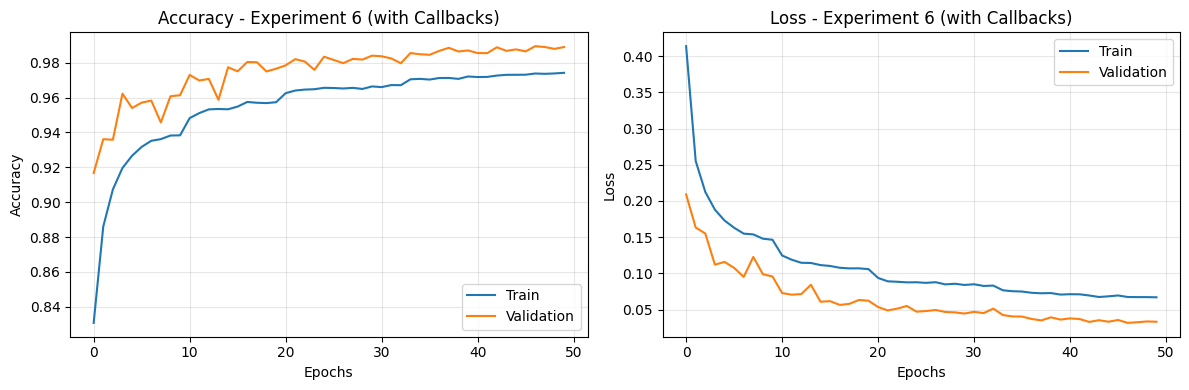

In [31]:
# CELL 6: Plot training history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_exp6.history['accuracy'], label='Train')
plt.plot(history_exp6.history['val_accuracy'], label='Validation')
plt.title('Accuracy - Experiment 6 (with Callbacks)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(history_exp6.history['loss'], label='Train')
plt.plot(history_exp6.history['val_loss'], label='Validation')
plt.title('Loss - Experiment 6 (with Callbacks)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ROC Curves - Experiment 6 (With Callbacks)
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


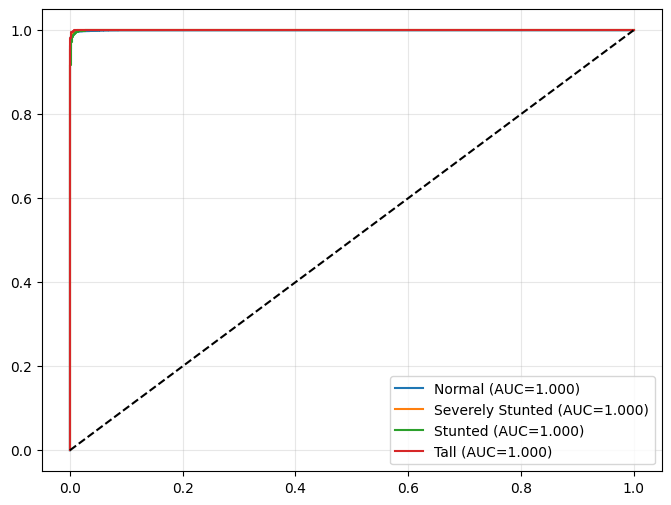

In [54]:
print("ROC Curves - Experiment 6 (With Callbacks)")

probs = model_exp6.predict(X_test_scaled)
plt.figure(figsize=(8,6))

for i, name in enumerate(le_stunting.classes_):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), probs[:, i])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [55]:
# Experiment 7
# Build model with different settings

tf.keras.backend.clear_session()

from tensorflow.keras.optimizers import Adamax

model_exp7 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(le_stunting.classes_), activation='softmax')
])

# Use Adamax optimizer (different from Adam)
optimizer = Adamax(learning_rate=0.002)

model_exp7.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_exp7.summary()
print("\nOptimizer: Adamax with lr=0.002")
print("Batch size: 64")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,108 (43.39 KB)

 Trainable params: 11,108 (43.39 KB)

 Non-trainable params: 0 (0.00 B)


Optimizer: Adamax with lr=0.002
Batch size: 64


In [56]:
# Train with larger batch size
history_exp7 = model_exp7.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=30,
    batch_size=64,  # Larger batch size
    verbose=1
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7854 - loss: 0.5627 - val_accuracy: 0.9262 - val_loss: 0.2243
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8774 - loss: 0.2757 - val_accuracy: 0.9463 - val_loss: 0.1668
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9028 - loss: 0.2202 - val_accuracy: 0.9585 - val_loss: 0.1277
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9174 - loss: 0.1880 - val_accuracy: 0.9546 - val_loss: 0.1157
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9246 - loss: 0.1700 - val_accuracy: 0.9679 - val_loss: 0.1008
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9349 - loss: 0.1505 - val_accuracy: 0.9500 - val_loss: 0.1127
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9421 - loss: 0.1373 - val_accuracy: 0.9577 - val_loss: 0.1001
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9434 - loss: 0.1327 - 

In [57]:
# Evaluate Experiment 7

y_pred_exp7_probs = model_exp7.predict(X_test_scaled)
y_pred_exp7 = np.argmax(y_pred_exp7_probs, axis=1)

print("="*50)
print("EXPERIMENT 7: Adamax + Batch Size 64")
print("="*50)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_exp7, target_names=le_stunting.classes_))

acc7 = accuracy_score(y_test, y_pred_exp7)
print(f"\nAccuracy: {acc7:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
EXPERIMENT 7: Adamax + Batch Size 64

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.98      0.99      0.99     14462
Severely Stunted       0.97      0.88      0.92      1164
         Stunted       0.94      0.96      0.95      3232
            Tall       0.98      0.79      0.87      1142

        accuracy                           0.97     20000
       macro avg       0.97      0.91      0.93     20000
    weighted avg       0.97      0.97      0.97     20000


Accuracy: 0.9708


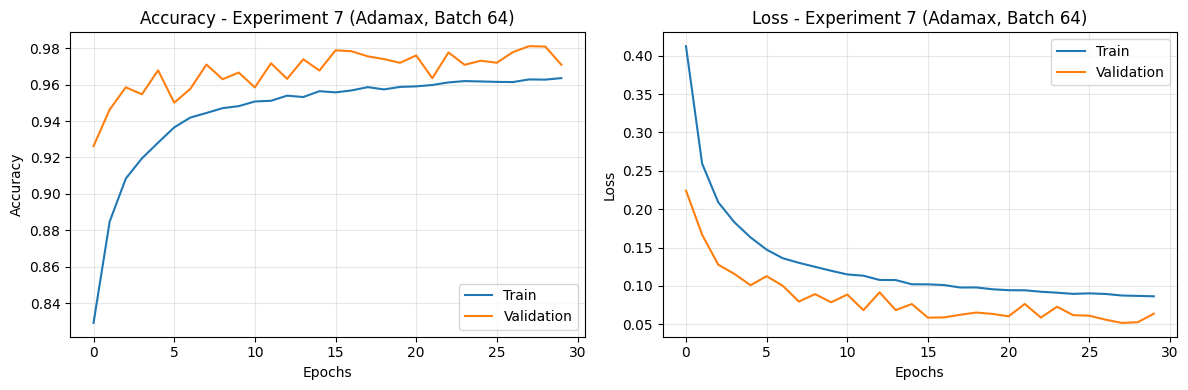

In [58]:
# Plot Experiment 7 history
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_exp7.history['accuracy'], label='Train')
plt.plot(history_exp7.history['val_accuracy'], label='Validation')
plt.title('Accuracy - Experiment 7 (Adamax, Batch 64)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1,2,2)
plt.plot(history_exp7.history['loss'], label='Train')
plt.plot(history_exp7.history['val_loss'], label='Validation')
plt.title('Loss - Experiment 7 (Adamax, Batch 64)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ROC Curves - Experiment 7 (Adamax + Batch 64)
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


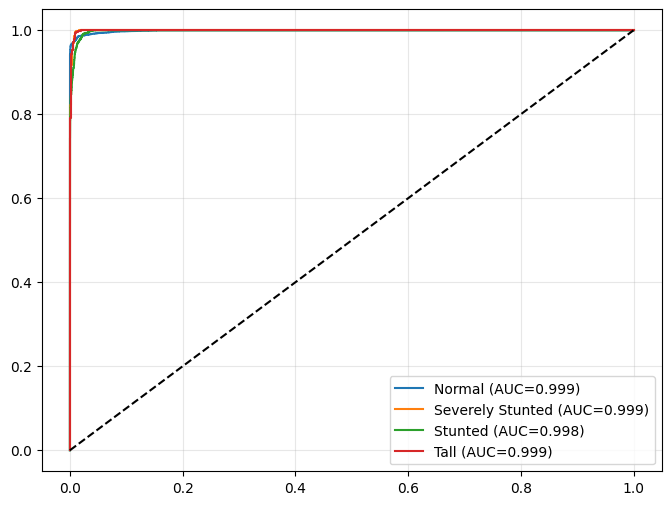

In [59]:
print("ROC Curves - Experiment 7 (Adamax + Batch 64)")

probs = model_exp7.predict(X_test_scaled)
plt.figure(figsize=(8,6))

for i, name in enumerate(le_stunting.classes_):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), probs[:, i])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [53]:
# Model comparisons and analysis
updated_results = pd.DataFrame({
    'Experiment': [
        'Exp 1 - Logistic Regression',
        'Exp 2 - Random Forest',
        'Exp 3 - Sequential NN',
        'Exp 4 - Functional NN',
        'Exp 5 - tf.data NN',
        'Exp 6 - With Callbacks',
        'Exp 7 - Adamax + Batch 64'
    ],
    'Accuracy': [
        acc1, acc2, acc3, acc4,
        accuracy_score(y_test, np.argmax(model5.predict(X_test_scaled), axis=1)),
        acc6, acc7
    ]
})

print("="*60)
print("UPDATED MODEL COMPARISON")
print("="*60)
print(updated_results.round(4))

# Save updated results
updated_results.to_csv('updated_results.csv')

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
UPDATED MODEL COMPARISON
                    Experiment  Accuracy
0  Exp 1 - Logistic Regression    0.8093
1        Exp 2 - Random Forest    1.0000
2        Exp 3 - Sequential NN    0.9658
3        Exp 4 - Functional NN    0.9710
4           Exp 5 - tf.data NN    0.9702
5       Exp 6 - With Callbacks    0.9896
6    Exp 7 - Adamax + Batch 64    0.9791


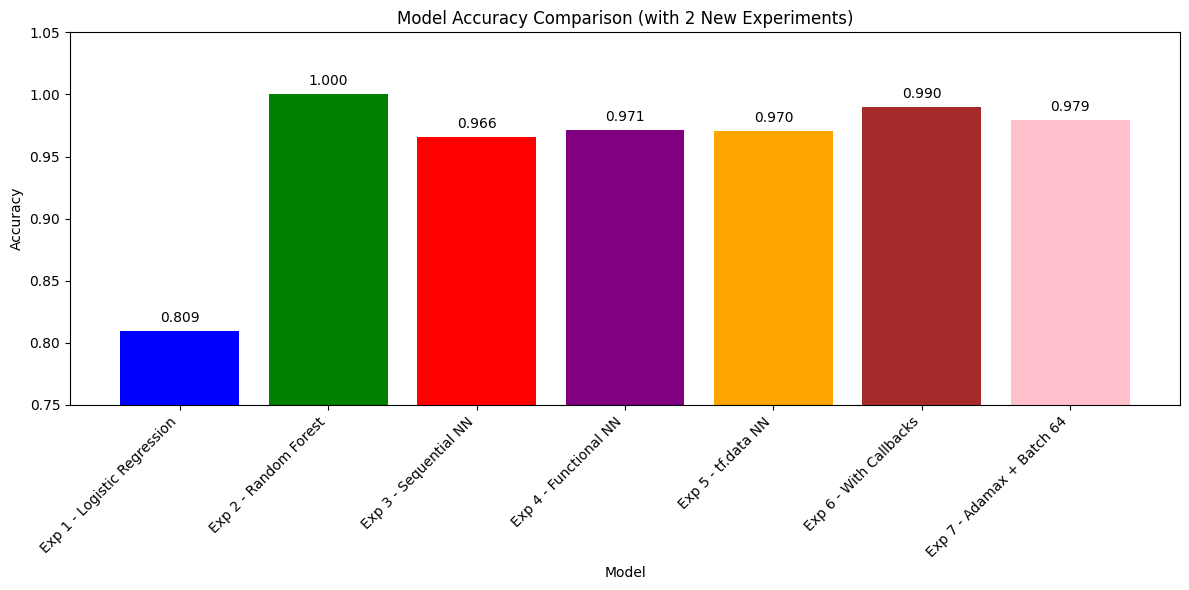

In [54]:
# Plot comparison
plt.figure(figsize=(12,6))
bars = plt.bar(updated_results['Experiment'], updated_results['Accuracy'],
        color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.title('Model Accuracy Comparison (with 2 New Experiments)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.75, 1.05)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()